In [42]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [43]:
dfStarbucks=pd.read_csv("starbucks-menu-nutrition-drinks.csv")
dfStarbucks.head()

,Drinks,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [45]:
dfStarbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Drinks     177 non-null    object
 1   Calories   177 non-null    object
 2   Fat (g)    177 non-null    object
 3   Carb. (g)  177 non-null    object
 4   Fiber (g)  177 non-null    object
 5   Protein    177 non-null    object
 6   Sodium     177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [46]:
#remove missing drinks data
df = dfStarbucks.replace("-", np.nan, regex=True)
df = df.dropna()
print(df)

                                                Drinks Calories  ... Protein Sodium
0             Cool Lime Starbucks Refreshers™ Beverage       45  ...       0     10
3       Strawberry Acai Starbucks Refreshers™ Beverage       80  ...       0     10
4    Very Berry Hibiscus Starbucks Refreshers™ Beve...       60  ...       0     10
8              Evolution Fresh™ Organic Ginger Limeade      110  ...       0      5
9                                          Iced Coffee        0  ...       0      0
..                                                 ...      ...  ...     ...    ...
159            Mocha Light Frappuccino® Blended Coffee      140  ...       4    180
168                               Cinnamon Dolce Crème      200  ...      10    135
171                                      Vanilla Crème      200  ...      10    135
172                                 Chocolate Smoothie      320  ...      20    170
173                                Strawberry Smoothie      300  ...      16

In [47]:
#Average amount of calories in a starbucks drink
df['Calories'] = pd.to_numeric(df['Calories'])
print("Avg Calories:",df["Calories"].mean())

#Average amount of Fat, Carb, Fiber, Protein, Sodium
df['Sodium'] = pd.to_numeric(df['Sodium'])
df['Protein'] = pd.to_numeric(df['Protein'])
df['Fat (g)'] = pd.to_numeric(df['Fat (g)'])
df['Fiber (g)'] = pd.to_numeric(df['Fiber (g)'])
df['Carb. (g)'] = pd.to_numeric(df['Carb. (g)'])

print("Avg Sodium:", df["Sodium"].mean())
print("Avg Protein:", df["Protein"].mean())
print("Avg Fat:", df["Fat (g)"].mean())
print("Avg Fiber:", df['Fiber (g)'].mean())
print("Avg Carb:", df['Carb. (g)'].mean())


Avg Calories: 135.2906976744186
Avg Sodium: 56.86046511627907
Avg Protein: 4.093023255813954
Avg Fat: 2.3255813953488373
Avg Fiber: 0.47674418604651164
Avg Carb: 24.953488372093023


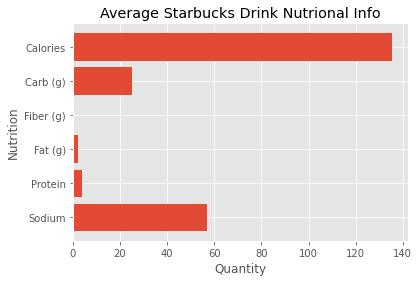

In [68]:
Nutrition = ['Sodium','Protein','Fat (g)','Fiber (g)','Carb (g)', 'Calories']
Quantity = [56.86046511627907,4.093023255813954,2.3255813953488373,0.47674418604651164,24.953488372093023,135.2906976744186]

plt.barh(Nutrition,Quantity)
plt.title('Average Starbucks Drink Nutrional Info')
plt.ylabel('Nutrition')
plt.xlabel('Quantity')
plt.show()

Total # of Drinks Higher than avg cal: 43


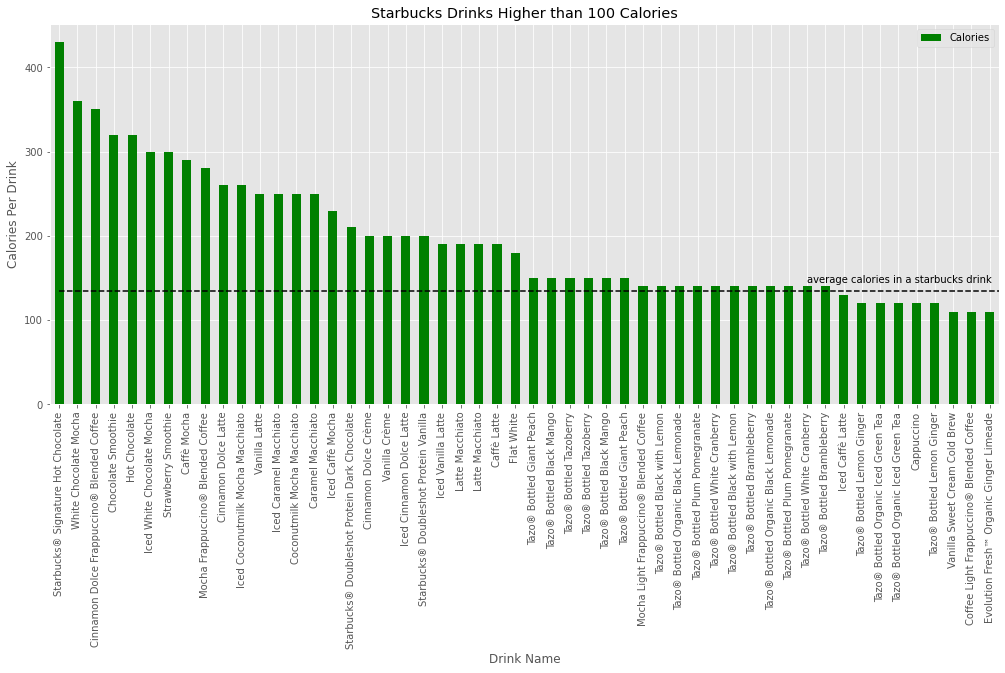

In [49]:
#Highest calorie drinks (calories greater than 100)
dfSortedHigh = df[df['Calories'] > 100]
dfHigherAvg = df[df['Calories'] > 135]
dfSorted1 = dfSortedHigh.sort_values(by='Calories', ascending=False)
#print(dfSorted1)

ax1 = dfSorted1.plot.bar(x = 'Drinks', y = 'Calories',color = "G", figsize=(17,7))
plt.title('Starbucks Drinks Higher than 100 Calories')
plt.ylabel('Calories Per Drink')
plt.xlabel("Drink Name")
plt.xticks(rotation=90)
plt.hlines(135, 0,300, linestyles='dashed')
plt.annotate('average calories in a starbucks drink',(41,145))

print("Total # of Drinks Higher than avg cal:", dfHigherAvg[dfHigherAvg.columns[0]].count())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

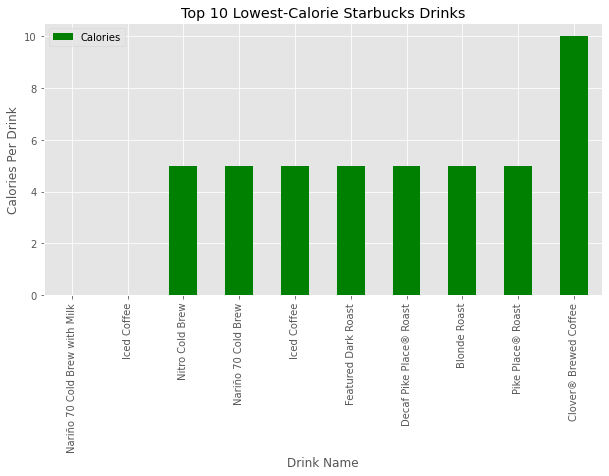

In [60]:
#Top 10 Lowest calorie drinks
dfSortedless = df[df['Calories'] < 100]
dfSorted2 = dfSortedless.sort_values(by='Calories', ascending=True)
dfSorted3 = dfSorted2.head(10)
#print(dfSorted3)

ax2 = dfSorted3.plot.bar(x = 'Drinks', y = 'Calories', color = "G", figsize=(10,5))
plt.title('Top 10 Lowest-Calorie Starbucks Drinks')
plt.ylabel('Calories Per Drink')
plt.xlabel("Drink Name")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

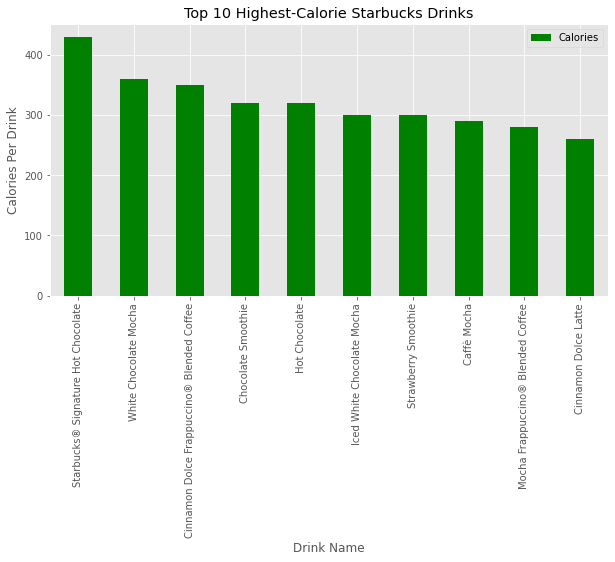

In [51]:
#Top 10 Highest calorie drinks

dfSorted4 = dfSorted1.head(10)

ax2 = dfSorted4.plot.bar(x = 'Drinks', y = 'Calories', color = "G", figsize=(10,5))
plt.title('Top 10 Highest-Calorie Starbucks Drinks')
plt.ylabel('Calories Per Drink')
plt.xlabel("Drink Name")
plt.xticks(rotation=90)

                                 Drinks  Calories  ...  Protein  Sodium
110  Starbucks® Signature Hot Chocolate       430  ...       12     115

[1 rows x 7 columns]


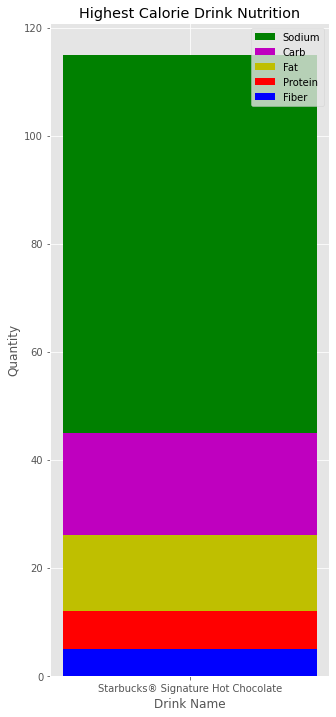

In [70]:
dfHC = df.sort_values(by="Calories", ascending= False).head(1)
print(dfHC)
dfHC['Sodium'] = pd.to_numeric(dfHC['Sodium'])
dfHC['Protein'] = pd.to_numeric(dfHC['Protein'])
dfHC['Fat (g)'] = pd.to_numeric(dfHC['Fat (g)'])
dfHC['Fiber (g)'] = pd.to_numeric(dfHC['Fiber (g)'])
dfHC['Carb. (g)'] = pd.to_numeric(dfHC['Carb. (g)'])

plt.figure(figsize=(5,12))
#plt.bar(dfHC["Drinks"], dfHC["Calories"], label='ITP115', color='c')
plt.bar(dfHC["Drinks"], dfHC["Sodium"], label='Sodium', color='g')
plt.bar(dfHC["Drinks"], dfHC["Carb. (g)"], label='Carb', color='m')
plt.bar(dfHC["Drinks"], dfHC["Fat (g)"], label='Fat', color='y')
plt.bar(dfHC["Drinks"], dfHC["Protein"], label='Protein', color='r')
plt.bar(dfHC["Drinks"], dfHC["Fiber (g)"], label='Fiber', color='b')

#plt.bar(year, ITP449, label='ITP449', color='r')

plt.xlabel('Drink Name')
plt.ylabel('Quantity')
plt.title('Highest Calorie Drink Nutrition')

plt.legend()
plt.show()


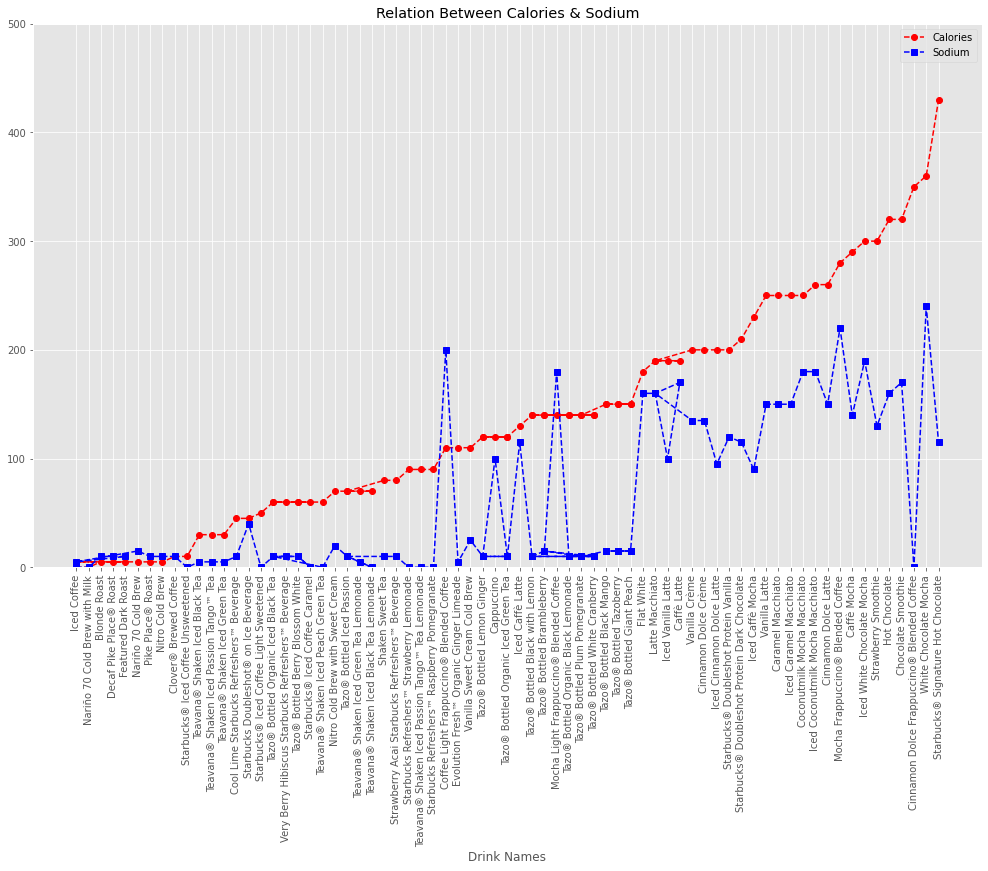

In [53]:
#Is there a correlation between sodium and calories?
dfSort = df.sort_values(by="Calories", ascending= True)
dfSort['Sodium'] = pd.to_numeric(dfSort['Sodium'])

plt.figure(figsize= (17,10))
plt.plot(dfSort["Drinks"], dfSort["Calories"], marker ='o', color = 'r', label='Calories', linestyle='--')
plt.plot(dfSort["Drinks"], dfSort["Sodium"], marker ='s', color = 'b', label='Sodium',linestyle='--')

plt.ylim(0,500)
plt.xticks(rotation=90)
plt.xlabel('Drink Names')
plt.title('Relation Between Calories & Sodium')

plt.legend()
plt.show()



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

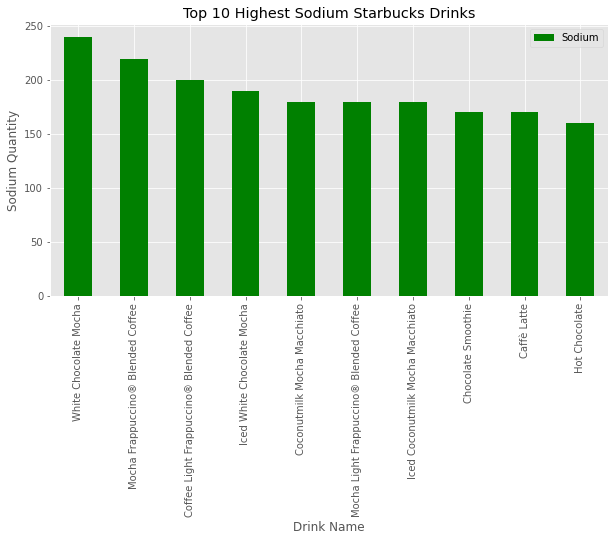

In [65]:
dfSodiumSort = df.sort_values(by='Sodium', ascending=False)
dfSodiumSort1 = dfSodiumSort.head(10)

ax2 = dfSodiumSort1.plot.bar(x = 'Drinks', y = 'Sodium', color = "g", figsize=(10,5))
plt.title('Top 10 Highest Sodium Starbucks Drinks')
plt.ylabel('Sodium Quantity')
plt.xlabel("Drink Name")
plt.xticks(rotation=90)

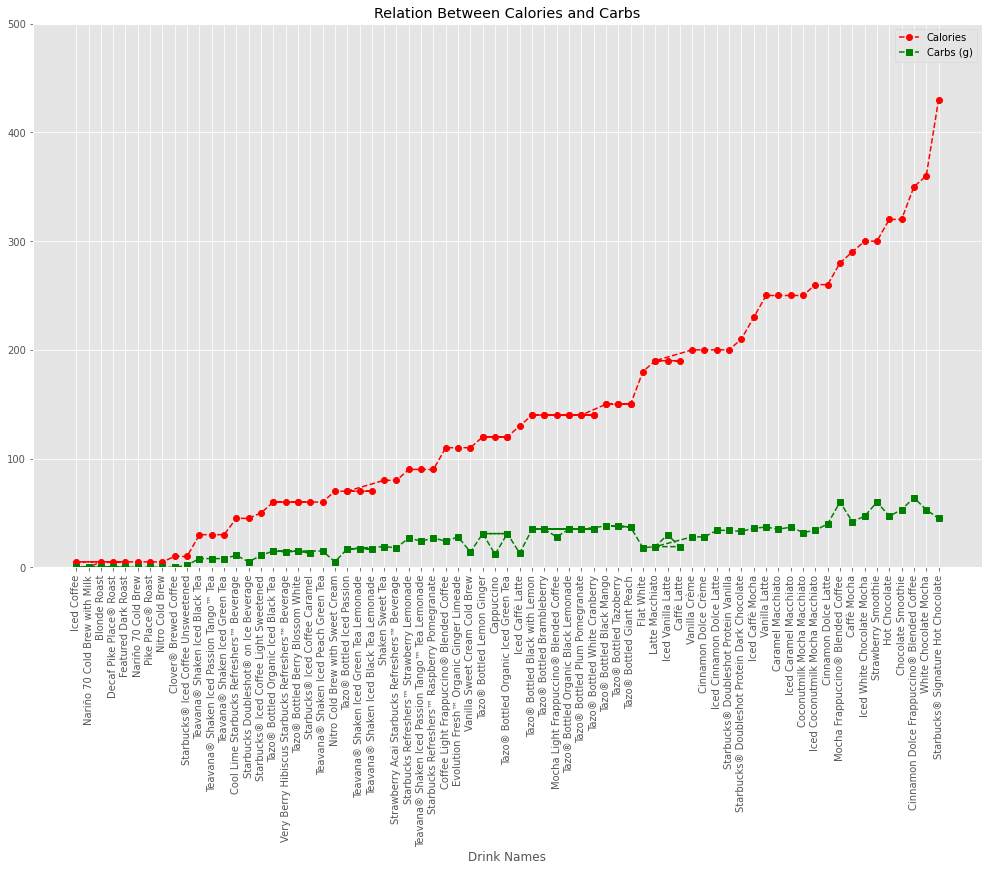

In [72]:
#Is there a correlation between carbs and calories?

dfSort['Carb. (g)'] = pd.to_numeric(dfSort['Carb. (g)'])

plt.figure(figsize= (17,10))
plt.plot(dfSort["Drinks"], dfSort["Calories"], marker ='o', color = 'r', label='Calories', linestyle='--')
plt.plot(dfSort["Drinks"], dfSort["Carb. (g)"], marker ='s', color = 'g', label='Carbs (g)',linestyle='--')

plt.ylim(0,500)
plt.xticks(rotation=90)
plt.xlabel('Drink Names')
plt.title('Relation Between Calories and Carbs')

plt.legend()
plt.show()


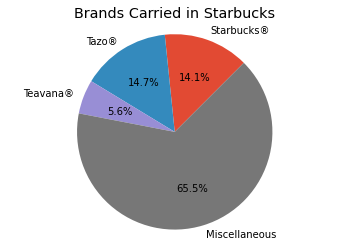

In [73]:
#Different drink brands Starbucks carries
dfStarbs = dfStarbucks[dfStarbucks['Drinks'].str.contains("Starbucks®")]
totalStarbs = dfStarbs[dfStarbs.columns[0]].count()
#print(totalStarbs)

dfTazo = dfStarbucks[dfStarbucks['Drinks'].str.contains("Tazo®")]
totalTazo = dfTazo[dfTazo.columns[0]].count()
#print(totalTazo)

dfTeavana = dfStarbucks[dfStarbucks['Drinks'].str.contains("Teavana®")]
totalTeavana = dfTeavana[dfTeavana.columns[0]].count()
#print(totalTeavana)

totalStarbucksDrinks = dfStarbucks[dfStarbucks.columns[0]].count()
#print("Total # of Starbucks Drinks:",dfStarbucks[dfStarbucks.columns[0]].count())

remaining = (totalStarbucksDrinks - totalTeavana - totalTazo - totalStarbs)
#print(remaining)

plt.style.use('ggplot')
starbrands= ['Starbucks®', 'Tazo®', 'Teavana®', 'Miscellaneous']
share = [(totalStarbs/totalStarbucksDrinks), (totalTazo/totalStarbucksDrinks), (totalTeavana/totalStarbucksDrinks), (remaining/totalStarbucksDrinks)]
plt.pie(share, labels=starbrands, autopct='%.1f%%', startangle=45)
plt.title('Brands Carried in Starbucks')
plt.axis('equal')
plt.show()

Total # of Coffee Drinks: 119


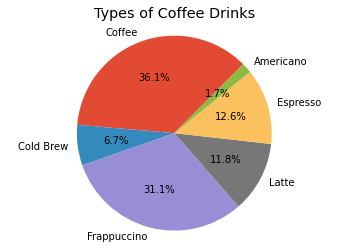

In [56]:
#Different types of coffee drinks
dfCoffee = dfStarbucks[dfStarbucks['Drinks'].str.contains("Coffee")]
totalCoffee = dfCoffee[dfCoffee.columns[0]].count()
#print(totalCoffee)

dfColdBrew = dfStarbucks[dfStarbucks['Drinks'].str.contains("Cold Brew")]
totalColdBrew = dfColdBrew[dfColdBrew.columns[0]].count()
#print(totalColdBrew)

dfFrap = dfStarbucks[dfStarbucks['Drinks'].str.contains("Frappuccino")]
totalFrap = dfFrap[dfFrap.columns[0]].count()
#print(totalFrap)

dfLatte = dfStarbucks[dfStarbucks['Drinks'].str.contains("Latte")]
totalLatte = dfLatte[dfLatte.columns[0]].count()
#print(totalLatte)

dfEspresso = dfStarbucks[dfStarbucks['Drinks'].str.contains("Espresso")]
totalEspresso = dfEspresso[dfEspresso.columns[0]].count()
#print(totalEspresso)

dfAmericano = dfStarbucks[dfStarbucks['Drinks'].str.contains("Americano")]
totalAmericano = dfAmericano[dfAmericano.columns[0]].count()
#print(totalAmericano)

totalCoffeeDrinks = totalCoffee+totalAmericano+totalColdBrew+totalFrap+totalLatte+totalEspresso
print("Total # of Coffee Drinks:",totalCoffeeDrinks)

plt.style.use('ggplot')
coffees = ['Coffee', 'Cold Brew', 'Frappuccino', 'Latte','Espresso', 'Americano']
share = [(totalCoffee/totalCoffeeDrinks), (totalColdBrew/totalCoffeeDrinks), (totalFrap/totalCoffeeDrinks), 
         (totalLatte/totalCoffeeDrinks), (totalEspresso/totalCoffeeDrinks), (totalAmericano/totalCoffeeDrinks)]
plt.pie(share, labels=coffees, autopct='%.1f%%', startangle=45)
plt.title('Types of Coffee Drinks')
plt.axis('equal')
plt.show()